In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!pip install graphviz
!pip install tensorflow_addons
!pip install tensorboardcolab


In [ ]:
from    keras.utils.vis_utils    import plot_model
from tensorboardcolab import TensorBoardColab

import time


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir ./

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
import pandas as pd
import os
from tensorflow.python.keras.utils.vis_utils import plot_model
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST
import tensorflow_addons as tfa
import datetime
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os
import cv2
from imutils import paths
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [ ]:
 tf.config.run_functions_eagerly(True)
#tf.config.experimental_run_functions_eagerly(True)

In [ ]:

def plot_results(images, n_cols=None):
    '''visualizes fake images'''
    display.clear_output(wait=False)  

    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1

    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)

    plt.figure(figsize=(n_cols, n_rows))
    
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

# 载入数据

In [ ]:

img_path = '/content/drive/MyDrive/Colab Notebooks/fianl_project/dataset/contours3/'
print("[INFO] 开始读取数据")
data_contour = []

img_list=os.listdir(img_path)
img_list.sort()
img_list.sort(key = lambda x: int(x[:-4])) ##文件名按数字排序
img_nums=len(img_list)
sorted_list=[]
for i in range(img_nums):
    img_name=img_path+img_list[i]
    sorted_list.append(img_name)
    #print(img_name)




In [ ]:
def binary(img,thresh):
  height, width = img.shape[0:2]
  for row in range(height):
    for col in range(width):
        # 获取到灰度值
        gray = img[row, col]
        # 如果灰度值高于阈值 就等于255最大值
        if gray > thresh:
            img[row, col] = 1
        # 如果小于阈值，就直接改为0
        elif gray < thresh:
            img[row, col] = 0
  return img

In [ ]:
# 3 遍历读取数据
data_contour = []
img_size=300
for imagePath in sorted_list:
    # 3.1 读取图像数据，由于使用神经网络，需要给定成一维
    #print(imagePath)
    image = cv2.imread(imagePath,0)   #读取图像
    image = np.array(image, dtype="float") / 255.0
    #print(image.shape)
    image=cv2.resize(image,(img_size,img_size))
    data_contour.append(image)   #在data的末尾，追加image数据


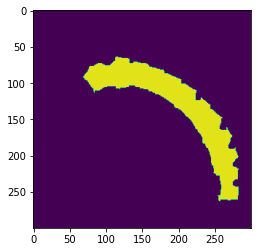

In [ ]:

plt.imshow(data_contour[400])

In [ ]:


initial_img=np.expand_dims(np.array(data_contour[400]), axis=0)


In [ ]:



initial_img=np.repeat(initial_img,540, axis=0)
X_train_initial=initial_img[0:420]
X_train_initial.shape
X_train_initial=np.reshape(X_train_initial,(-1,img_size,img_size,1))
X_test_initial=initial_img[0:120]
X_test_initial.shape
X_test_initial=np.reshape(X_test_initial,(-1,img_size,img_size,1))

In [ ]:
X_train_initial=np.array(X_train_initial)

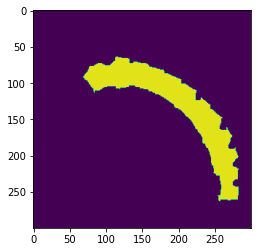

In [ ]:

a=np.reshape(X_train_initial[233],(img_size,img_size))
plt.imshow(a)

In [ ]:
X_test_initial.shape

(120, 300, 300, 1)

In [ ]:

data_contours=np.array(data_contour)
#data_contours=np.random.shuffle(data_contours)


In [ ]:
signal=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fianl_project/dataset/markersensortrail1all.csv")
#signal.head(5)
signal=np.array(signal)
signal=signal[360:,1:]
signal=signal-signal[400,:]
signal.shape

(540, 3)

In [ ]:
def normalization(data):
    range = np.max(data) - np.min(data)
    return (data - np.min(data)) / range
signal_data=normalization(signal)
signal_data[0:5,]

array([[0.82396285, 0.99825838, 0.82246684],
       [0.82454338, 0.99754388, 0.8210155 ],
       [0.82246684, 0.99790113, 0.81431697],
       [0.75331577, 0.96074666, 0.82525789],
       [0.82353861, 0.99732059, 0.82347162]])

In [ ]:
signal.max(axis=0)

array([2.9896, 3.7712, 2.9886])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_contours, signal_data, test_size=0.221, random_state=45)


In [ ]:
X_train.shape

(420, 300, 300)

In [ ]:
X_train=np.reshape(X_train,(-1,img_size,img_size,1))
X_test=np.reshape(X_test,(-1,img_size,img_size,1))

In [ ]:
y_test.shape

(120, 3)

In [ ]:
def generate_and_save_images(model, epoch, step, test_input,img_size):
  """Helper function to plot our 16 images

  Args:

  model -- the decoder model
  epoch -- current epoch number during training
  step -- current step number during training
  test_input -- random tensor with shape (16, LATENT_DIM)
  """
  predictions = model.predict(test_input)
  predictions=np.array(predictions)

  fig = plt.figure(figsize=(6,6))

  for i in range(predictions.shape[0]):
      plt.subplot(6, 6, i+1)
      img = predictions[i, :, :] * 255
      img=np.reshape(img,[img_size,img_size])
      img = img.astype('int32')
      plt.imshow(img)
      plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  fig.suptitle("epoch: {}, step: {}".format(epoch, step))
  plt.savefig('image_at_epoch_{:04d}_step{:04d}.png'.format(epoch, step))
  plt.show()

## 构建tensorflow 数据集

In [ ]:

# get the list containing the image paths


BATCH_SIZE=30

# split the paths list into to training (80%) and validation sets(20%).


# load the training image paths into tensors, create batches and shuffle
training_dataset1 = tf.data.Dataset.from_tensor_slices((X_train_initial,y_train))
training_dataset2 = tf.data.Dataset.from_tensor_slices((X_train))
training_datasets = tf.data.Dataset.zip((training_dataset1, training_dataset2))
training_dataset = training_datasets.shuffle(1000).batch(BATCH_SIZE)

# load the validation image paths into tensors and create batches
validation_dataset1 = tf.data.Dataset.from_tensor_slices((X_test_initial,y_test))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((X_test))
#validation_dataset = validation_dataset.map(map_image)
validation_dataset = tf.data.Dataset.zip((validation_dataset1, validation_dataset2))
validation_dataset = validation_dataset.batch(BATCH_SIZE)


print(f'number of batches in the training set: {len(training_dataset)}')
print(f'number of batches in the validation set: {len(validation_dataset)}')

number of batches in the training set: 14
number of batches in the validation set: 4


tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)
tf.Tensor([300 300   1], shape=(3,), dtype=int32)


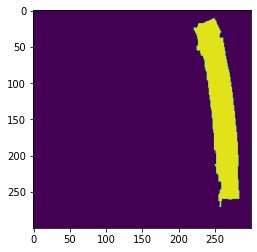

In [ ]:

for step, x_batch_train in enumerate(training_dataset):
  #arr1 = np.array(x_batch_train,dtype=float)
  #x_batch_train[1]=tf.convert_to_tensor(x_batch_train[1])
  #x_batch_train[1]= tf.reshape(x_batch_train[1],[-1,300,300,1])
  a=np.reshape(x_batch_train[1][0],(img_size,img_size))
  plt.imshow(a)
  print(tf.shape(x_batch_train[1][0]))

# 建立模型

## 100*100 尝试

In [ ]:
class Sampling(tf.keras.layers.Layer):
  def call(self, inputs):
    """Generates a random sample and combines with the encoder output
    
    Args:
      inputs -- output tensor from the encoder

    Returns:
      `inputs` tensors combined with a random sample
    """
    ### START CODE HERE ###
    mu, sigma = inputs
    batch = tf.shape(mu)[0]
    dim = tf.shape(mu)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    z = mu + tf.exp(0.5 * sigma) * epsilon
    ### END CODE HERE ###
    return  z
def kl_reconstruction_loss(inputs, outputs, mu, sigma):
  """ Computes the Kullback-Leibler Divergence (KLD)
  Args:
    inputs -- batch from the dataset
    outputs -- output of the Sampling layer
    mu -- mean
    sigma -- standard deviation

  Returns:
    KLD loss
  """
  kl_loss = 1 + sigma - tf.square(mu) - tf.math.exp(sigma)
  return tf.reduce_mean(kl_loss) * -0.5

In [ ]:
def encoder_layers(latent_dim,input_img,input_signal):
  input_img=tf.keras.layers.GaussianNoise(0.1)(input_img)
  '''Defines the encoder with two Conv2D and max pooling layers.'''
  conv_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same',strides=2)(input_img)
  max_pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_1)

  conv_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same',strides=2)(max_pool_1)
  max_pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_2)

  conv_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same',strides=2)(max_pool_2)
  max_pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_3)

  x = tf.keras.layers.Flatten(name="encode_flatten")(max_pool_3)
  input_siganl=tf.keras.layers.Flatten()(input_signal)
  input_dense = tf.keras.layers.Dense(100, name='signal_dense1')(input_siganl)
  x=tf.concat([x,input_dense],1)
  x = tf.keras.layers.Dense(1000, activation='relu', name="encode_dense")(x)
  x = tf.keras.layers.BatchNormalization()(x)
  mu = tf.keras.layers.Dense(latent_dim, name='latent_mu')(x)
  mu = tf.keras.layers.BatchNormalization()(mu)
  sigma = tf.keras.layers.Dense(latent_dim, name ='latent_sigma')(x)
  sigma = tf.keras.layers.BatchNormalization()(sigma)

  return mu, sigma, x.shape

In [ ]:
def decoder_layers(input1,input2):
  '''Defines the decoder path to upsample back to the original image size.'''
  #units = conv_shape[1] * conv_shape[2] * conv_shape[3]
  x1 = tf.keras.layers.Dense(4000, activation = 'relu', name="decode_dense1")(input1)
  x1 = tf.keras.layers.BatchNormalization()(x1)
  input2=tf.keras.layers.GaussianNoise(0.1)(input2)
  x2 = tf.keras.layers.Dense(1000, name='signal_dense2')(input2)
  x=tf.concat([x1,x2],1)
  x = tf.keras.layers.Dense(2000, name='signal_dense3')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Reshape([10,10,20], name="decode_reshape")(x)
  x = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=3, strides=2, padding='same', activation='relu', name="decode_conv2d_1")(x)
  x = tf.keras.layers.BatchNormalization()(x)
  
  x = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', name="decode_conv2d_12")(x)
  x = tf.keras.layers.BatchNormalization()(x)
  
  x = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu', name="decode_conv2d_2")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2DTranspose(filters=8, kernel_size=3, strides=1, padding='same', activation='relu', name="decode_conv2d_3")(x)
  x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding='same', activation='sigmoid', name="decode_final")(x)


  return x

In [ ]:
def vae_models():
  latent_dim=512
  inputs1 = tf.keras.layers.Input(shape=(80, 80, 1,))
  inputs2= tf.keras.layers.Input(shape=(3))
  mu, sigma, x_shape=encoder_layers(latent_dim,inputs1,inputs2)
  z = Sampling()((mu, sigma))
  decoder_output=decoder_layers(z,inputs2)
  model = tf.keras.Model(inputs =[inputs1,inputs2], outputs=decoder_output)
  loss = kl_reconstruction_loss(inputs1, z, mu, sigma)
  model.add_loss(loss)
  return model



In [ ]:
vae_auto_models = vae_models()
vae_auto_models.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 1)]  0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 80, 80, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 40, 40, 64)   1664        ['gaussian_noise[0][0]']         
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 64)   0           ['conv2d[0][0]']                 
                                                                                              

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_metric = tf.keras.metrics.Mean()
mse_loss = tf.keras.losses.MeanSquaredError()
bce_loss = tf.keras.losses.BinaryCrossentropy()

In [ ]:
# Training loop. Display generated images each epoch

### START CODE HERE ###
epochs =200
### END CODE HERE ###

#random_vector_for_generation = tf.random.normal(shape=[16, LATENT_DIM])
#generate_and_save_images(decoder, 0, 0, random_vector_for_generation)

for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  # Iterate over the batches of the dataset.
  for step, x_batch_train in enumerate(training_dataset):
    with tf.GradientTape() as tape:
      ### START CODE HERE ### 
      reconstructed = vae_auto_models(x_batch_train[0])
      # Compute reconstruction loss
      flattened_inputs = tf.reshape(x_batch_train[1], shape=[-1])
      flattened_outputs = tf.reshape(reconstructed, shape=[-1])
      loss = bce_loss(flattened_inputs, flattened_outputs) * 300 * 300 * 1
      loss += sum(vae_auto_models.losses) 

    grads =tape.gradient(loss, vae_auto_models.trainable_weights)
    optimizer.apply_gradients(zip(grads, vae_auto_models.trainable_weights))
    ### END CODE HERE
    
    loss_metric(loss)

    if step % 10 == 0:
      display.clear_output(wait=False)    
      generate_and_save_images(vae_auto_models, epoch, step, x_batch_train[0],img_size)
    print('Epoch: %s step: %s mean loss = %s' % (epoch, step, loss_metric.result().numpy()))

Start of epoch 0


ValueError: ignored

In [ ]:
 def generate_and_save_images(model, epoch, step, test_input):
  """Helper function to plot our 16 images

  Args:

  model -- the decoder model
  epoch -- current epoch number during training
  step -- current step number during training
  test_input -- random tensor with shape (16, LATENT_DIM)
  """
  predictions = model.predict(test_input)
  predictions=np.array(predictions)

  fig = plt.figure(figsize=(6,6))

  for i in range(predictions.shape[0]):
      plt.subplot(6, 6, i+1)
      img = predictions[i, :, :] * 255
      img=np.reshape(img,[300,300])
      img = img.astype('int32')
      plt.imshow(img)
      plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  fig.suptitle("epoch: {}, step: {}".format(epoch, step))
  plt.savefig('image_at_epoch_{:04d}_step{:04d}.png'.format(epoch, step))
  plt.show()

# show performance

In [ ]:
def display_one_row(disp_images, offset, shape=(img_size, img_size)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_predicted,disp_expect, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(img_size,img_size,))
  #display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_expect, 10, shape=(img_size,img_size,))
  display_one_row(disp_predicted, 20, shape=(img_size,img_size,))
  

the programe cost 0.10113716125488281


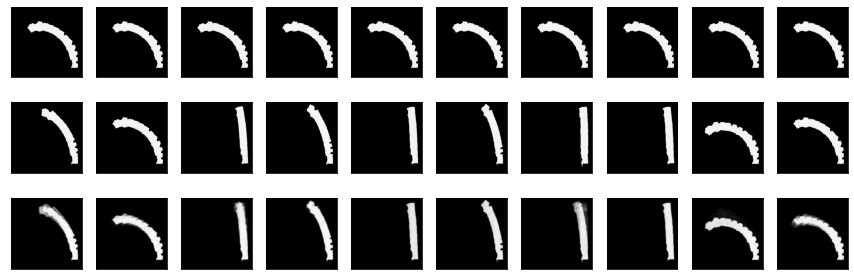

In [ ]:
# take 1 batch of the dataset
#test_dataset = test_dataset.take(1)

# take the input images and put them in a list
# output_samples = []
# for input_image in tfds.as_numpy(X_test):
#       output_samples = input_image
output_samples=X_test
# pick 10 indices
i=2
idxs = np.array([1+i, 2+i, 3+i, 4+i, 5+i, 6+i, 7+i, 8+i, 9+i, 10+i])

# prepare test samples as a batch of 10 images
conv_output_samples = np.array(output_samples[idxs])
conv_output_samples = np.reshape(conv_output_samples, (10,img_size,img_size, 1))
test_input_samples=np.array(X_test_initial[idxs])
test_input_samples_img = np.reshape(test_input_samples, (10,img_size,img_size, 1))
test_input_sample_signal=np.array(y_test[idxs])
# get the encoder ouput
#encoded = convolutional_encoder_model.predict([test_input_samples_img,test_input_sample_signal])
start=time.time()
# get a prediction for some values in the dataset
predicted = vae_auto_models.predict([test_input_samples_img,test_input_sample_signal])
end=time.time()
print("the programe cost",end-start)
# display the samples, encodings and decoded values!
display_results(test_input_samples,predicted,conv_output_samples, enc_shape=(7,7))

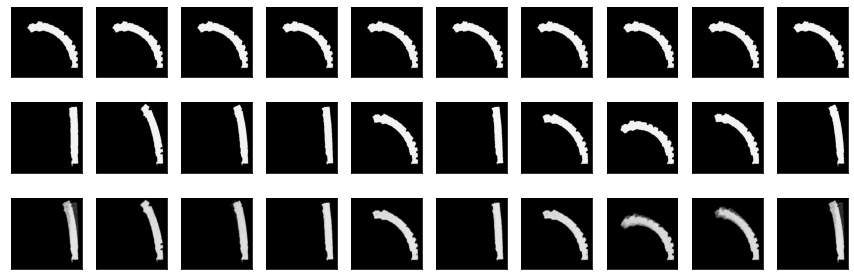

In [ ]:
# take 1 batch of the dataset
#test_dataset = test_dataset.take(1)

# take the input images and put them in a list
# output_samples = []
# for input_image in tfds.as_numpy(X_test):
#       output_samples = input_image
output_samples=X_train
# pick 10 indices
i=10

idxs = np.array([1+i, 2+i, 3+i, 4+i, 5+i, 6+i, 7+i, 8+i, 9+i, 10+i])

# prepare test samples as a batch of 10 images
conv_output_samples = np.array(output_samples[idxs])
conv_output_samples = np.reshape(conv_output_samples, (10,img_size,img_size, 1))
train_input_samples=np.array(X_train_initial[idxs])
train_input_samples_img = np.reshape(train_input_samples, (10,img_size,img_size, 1))
train_input_sample_signal=np.array(y_train[idxs])
# get the encoder ouput
#encoded = convolutional_encoder_model.predict([test_input_samples_img,test_input_sample_signal])

# get a prediction for some values in the dataset
predicted = vae_auto_models.predict([train_input_samples_img,train_input_sample_signal])

# display the samples, encodings and decoded values!
display_results(train_input_samples,predicted,conv_output_samples, enc_shape=(7,7))

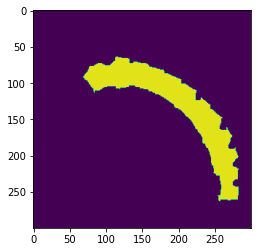

In [ ]:
plt.imshow(test_input_samples_img[1].reshape(300,300))

# 300*300尝试 VAE

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import numpy as np

import os
import zipfile
import urllib.request
import random
from IPython import display

# set a random seed
np.random.seed(51)

# parameters for building the model and training
BATCH_SIZE=30
LATENT_DIM=1024
IMAGE_SIZE=300

# 300*300模型搭建

In [ ]:

def Sampling(mu, sigma):
  """Generates a random sample and combines with the encoder output
  
  Args:
    inputs -- output tensor from the encoder

  Returns:
    `inputs` tensors combined with a random sample
  """
  ### START CODE HERE ###
  mu, sigma 
  batch = tf.shape(mu)[0]
  dim = tf.shape(mu)[1]
  epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
  z = mu + tf.exp(0.5 * sigma) * epsilon
  ### END CODE HERE ###
  return  z

In [ ]:
def kl_reconstruction_loss(mu, sigma):
  """ Computes the Kullback-Leibler Divergence (KLD)
  Args:
    inputs -- batch from the dataset
    outputs -- output of the Sampling layer
    mu -- mean
    sigma -- standard deviation

  Returns:
    KLD loss
  """
  kl_loss = 1 + sigma - tf.square(mu) - tf.math.exp(sigma)
  return tf.reduce_mean(kl_loss) * -0.5

In [ ]:
def get_distribution(latent_dim,input_img,input_signal):
  input_img=tf.keras.layers.Flatten()(input_img)
  #input_img=tf.keras.layers.Dense(4000)(input_img)
  input_signal=tf.keras.layers.Flatten()(input_signal)
  #input_signal=tf.keras.layers.GaussianNoise(0.2)(input_signal)
  input_signal=tf.keras.layers.Dense(100)(input_signal)
  x=tf.concat([input_signal,input_img],1)
  x = tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  mu = tf.keras.layers.Dense(latent_dim)(x)
  sigma = tf.keras.layers.Dense(latent_dim)(x)
  return mu,sigma

In [ ]:
def encoder_layers(latent_dim,input_img,input_signal):
  '''Defines the encoder with two Conv2D and max pooling layers.'''
  #input_img=tf.keras.layers.GaussianNoise(0.1)(input_img)
  conv_1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same',name='conv1',strides=2)(input_img)
  max_pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_1)
  mu1,sigma1=get_distribution(latent_dim,max_pool_1,input_signal)
 
  conv_2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same',name='conv2',strides=2)(max_pool_1)
  max_pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_2)
  mu2,sigma2=get_distribution(latent_dim/3,max_pool_2,input_signal)

  conv_3 = tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same',name='conv3',strides=2)(max_pool_2)
  max_pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_3)
  mu3,sigma3=get_distribution(latent_dim/6,max_pool_3,input_signal)

  conv_4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same',name='conv4',strides=2)(max_pool_3)
  max_pool_4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_4)
  mu4,sigma4=get_distribution(latent_dim/12,max_pool_4,input_signal)




  return mu1, sigma1, mu2, sigma2, mu3, sigma3 ,mu4, sigma4

In [ ]:
def get_nerual(z,input_signal):
  z=tf.keras.layers.Flatten()(z)
  z = tf.keras.layers.Dense(4000, activation = 'relu')(z)
  z = tf.keras.layers.BatchNormalization()(z)
  input_signal=tf.keras.layers.Flatten()(input_signal)
  input_signal = tf.keras.layers.Dense(1000 ,activation = 'relu')(input_signal)
  z=tf.concat([z,input_signal],1)
  return z

In [ ]:
def decoder_layers(z1,z2,z3,z4,input_signal):
  '''Defines the decoder path to upsample back to the original image size.'''
  #units = conv_shape[1] * conv_shape[2] * conv_shape[3]
  z4=get_nerual(z4,input_signal)
  x = tf.keras.layers.Dense(800,kernel_regularizer=keras.regularizers.l1(0.01))(z4)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Reshape([5,5,32], name="decode_reshape0")(x)

  #conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(x)
  conv_0 = tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))(x)
  up_sample_0 = tf.keras.layers.UpSampling2D(size=(5,5))(conv_0)
  
  z3=get_nerual(z3,input_signal)
  z3 = tf.keras.layers.Dense(5000,kernel_regularizer=keras.regularizers.l1(0.01),name="decoder_dense0")(z3)
  z3 = tf.keras.layers.BatchNormalization()(z3)
  z3 = tf.keras.layers.Reshape([25,25,8], name="decode_reshape1")(z3)
  z3=tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(z3)
  up_sample_1=tf.keras.layers.Add()([up_sample_0,z3])

  #conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(x)
  conv_1 = tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))(z3)
  up_sample_1 = tf.keras.layers.UpSampling2D(size=(3,3))(conv_1)
  
  z2=get_nerual(z2,input_signal)
  z2 = tf.keras.layers.Dense(22500,kernel_regularizer=keras.regularizers.l1(0.01),name="decoder_dense1")(z2)
  z2 = tf.keras.layers.BatchNormalization()(z2)
  z2 = tf.keras.layers.Reshape([75,75,4], name="decode_reshape2")(z2)
  z2=tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(z2)
  up_sample_1=tf.keras.layers.Add()([up_sample_1,z2])


  # conv_2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(4,4), activation='relu', padding='same')(up_sample_1)
  conv_2 = tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))(up_sample_1)
  # conv_2 = tf.keras.layers.BatchNormalization()(conv_2)
  up_sample_2 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_2)

  z1=get_nerual(z1,input_signal)
  z1 = tf.keras.layers.Dense(22500,kernel_regularizer=keras.regularizers.l1(0.01))(z1)
  z1 = tf.keras.layers.BatchNormalization()(z1)
  z1 = tf.keras.layers.Reshape([150,150,1], name="decode_reshape3")(z1)
  z1=tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(z1)
  up_sample_2=tf.keras.layers.Add()([up_sample_2,z1])

  #conv_3 = tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2), activation='relu', padding='same')(up_sample_2)
  # conv_3 = tf.keras.layers.BatchNormalization()(conv_3)
  conv_3 = tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2), activation='relu', padding='same'))(up_sample_2)
  up_sample_3 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_3)

  conv_4 = tf.keras.layers.Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid', padding='same')(up_sample_3)

  return conv_4

In [ ]:
def vae_models():
  latent_dim=4096
  inputs1 = tf.keras.layers.Input(shape=(300, 300, 1,))
  inputs2= tf.keras.layers.Input(shape=(3))
  mu1, sigma1, mu2, sigma2, mu3, sigma3, mu4, sigma4=encoder_layers(latent_dim,inputs1,inputs2)
  z1 = Sampling(mu1, sigma1)
  z2 = Sampling(mu2, sigma2)
  z3 = Sampling(mu3, sigma3)
  z4 = Sampling(mu4, sigma4)
  decoder_output=decoder_layers(z1,z2,z3,z4,inputs2)
  model = tf.keras.Model(inputs =[inputs1,inputs2], outputs=decoder_output)
  loss1 = kl_reconstruction_loss(mu1, sigma1)

  loss2 = kl_reconstruction_loss(mu2, sigma2)
  loss3 = kl_reconstruction_loss(mu3, sigma3)
  loss4 = kl_reconstruction_loss(mu4, sigma4)
  loss=loss1+loss2+loss3+loss4
  model.add_loss(loss)
  return model





In [ ]:

vae_auto_models = vae_models()
vae_auto_models.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 150, 150, 8)  80          ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 75, 75, 8)    0           ['conv1[0][0]']                  
                                                                                                  
 conv2 (Conv2D)                 (None, 38, 38, 16)   1168        ['max_pooling2d[0][0]']      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008)
loss_metric = tf.keras.metrics.Mean()
mse_loss = tf.keras.losses.MeanSquaredError()
bce_loss = tf.keras.losses.BinaryCrossentropy()

In [ ]:
# current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
# test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
# train_summary_writer = tf.summary.create_file_writer(train_log_dir)
# test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [ ]:
### 感知模型Perceptual Loss
def VGGloss(y_true, y_pred):  # Note the parameter order
    from keras.applications.vgg16 import VGG16
    mod = VGG16(include_top=False, weights='imagenet')
    pred = K.concatenate([y_pred, y_pred, y_pred])
    true = K.concatenate([y_true, y_true, y_true])
    vggmodel = mod 
    f_p = vggmodel(pred)  
    f_t = vggmodel(true)  
    return K.mean(K.square(f_p - f_t)) 


In [ ]:
# % tensorboard --logdir logs/gradient_tape

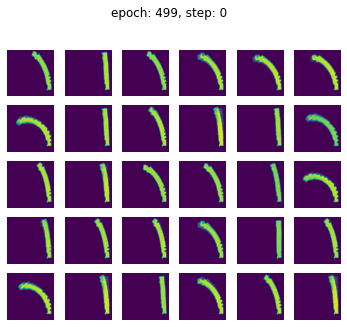

Epoch: 499 step: 0 mean loss = 7501.876
Epoch: 499 step: 1 mean loss = 7501.618
Epoch: 499 step: 2 mean loss = 7501.478
Epoch: 499 step: 3 mean loss = 7501.2773
Epoch: 499 step: 4 mean loss = 7501.075
Epoch: 499 step: 5 mean loss = 7500.9
Epoch: 499 step: 6 mean loss = 7500.74
Epoch: 499 step: 7 mean loss = 7500.6494


In [ ]:
# Training loop. Display generated images each epoch

### START CODE HERE ###
epochs =500
### END CODE HERE ###

#random_vector_for_generation = tf.random.normal(shape=[16, LATENT_DIM])
#generate_and_save_images(decoder, 0, 0, random_vector_for_generation)

for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  # Iterate over the batches of the dataset.
  for step, x_batch_train in enumerate(training_dataset):
    with tf.GradientTape() as tape:
      ### START CODE HERE ### 
      reconstructed = vae_auto_models(x_batch_train[0])
      # Compute reconstruction loss
      flattened_inputs = tf.reshape(x_batch_train[1], shape=[-1])
      flattened_outputs = tf.reshape(reconstructed, shape=[-1])
      loss = bce_loss(flattened_inputs, flattened_outputs) * 300 * 300 * 1
      loss += sum(vae_auto_models.losses) 

    grads =tape.gradient(loss, vae_auto_models.trainable_weights)
    optimizer.apply_gradients(zip(grads, vae_auto_models.trainable_weights))
    ### END CODE HERE
    
    loss_metric(loss)

    if step % 10 == 0:
      display.clear_output(wait=False)    
      generate_and_save_images(vae_auto_models, epoch, step, x_batch_train[0],img_size)
    print('Epoch: %s step: %s mean loss = %s' % (epoch, step, loss_metric.result().numpy()))
  # with train_summary_writer.as_default():
  #   tf.summary.scalar('loss', loss_metric.result().numpy(), step=epoch)
 

In [ ]:
test_dataset = validation_dataset.take(2)
output_samples = []

for input_image in tfds.as_numpy(test_dataset):
      output_samples = input_image

idxs = np.random.choice(64, size=10)

vae_predicted = vae_auto_models.predict(test_dataset)*255
#display_results(output_samples[idxs], vae_predicted[idxs])

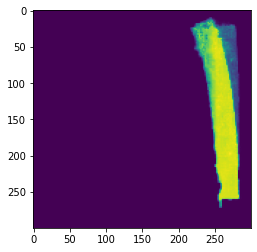

In [ ]:
aa=vae_predicted[59].reshape([300,300])
aa=aa*25500
plt.imshow(aa)

In [ ]:
vae_predicted.shape

(60, 300, 300, 1)

In [ ]:
convolutional_model, convolutional_encoder_model = convolutional_auto_encoder()
convolutional_model.summary()

In [ ]:
vae_auto_models.save(r'/content/drive/MyDrive/Colab Notebooks/fianl_project/model/model_epoch500_differ_300_bt30_lt4096_4point.h5')

NameError: ignored

In [ ]:
vae_auto_models = tf.keras.models.load_model(r'/content/drive/MyDrive/Colab Notebooks/fianl_project/model/model_epoch500_differ_300_bt30_lt256.h5')

# IOU Pipeline

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


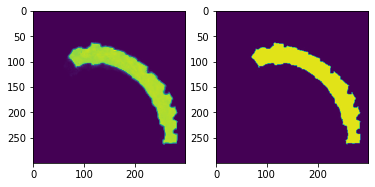

In [ ]:
def display_one_row(disp_images, offset, shape=(img_size, img_size)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_predicted,disp_expect, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(img_size,img_size,))
  #display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_expect, 10, shape=(img_size,img_size,))
  display_one_row(disp_predicted, 20, shape=(img_size,img_size,))
# take 1 batch of the dataset
#test_dataset = test_dataset.take(1)

# take the input images and put them in a list
# output_samples = []
# for input_image in tfds.as_numpy(X_test):
#       output_samples = input_image
output_samples=data_contours
# pick 10 indices
idxs = np.array([395])

# prepare test samples as a batch of 10 images
conv_output_samples = np.array(output_samples[idxs])
conv_output_samples = np.reshape(conv_output_samples, (1,img_size,img_size, 1))
test_input_samples=np.array(initial_img[idxs])
test_input_samples_img = np.reshape(test_input_samples, (1,img_size,img_size, 1))
test_input_sample_signal=np.array(signal_data[idxs])
# get the encoder ouput
#encoded = convolutional_encoder_model.predict([test_input_samples_img,test_input_sample_signal])

# get a prediction for some values in the dataset
predicted = vae_auto_models.predict([test_input_samples_img,test_input_sample_signal])

# display the samples, encodings and decoded values!
#display_results(test_input_samples,predicted,conv_output_samples, enc_shape=(7,7))
predicteds=np.reshape(predicted,[300,300])
conv_output_samples=np.reshape(conv_output_samples,[300,300])
plt.subplot(1,2,1)
#plt.title('predicted_img',color='blue') 
plt.imshow(predicteds)
plt.subplot(1,2,2)
plt.imshow(conv_output_samples)
#plt.title('initial_img',color='blue') 

In [ ]:
def binary(img,thresh):
  height, width = img.shape[0:2]
  for row in range(height):
    for col in range(width):
        # 获取到灰度值
        gray = img[row, col]
        # 如果灰度值高于阈值 就等于255最大值
        if gray > thresh:
            img[row, col] = 1
        # 如果小于阈值，就直接改为0
        elif gray < thresh:
            img[row, col] = 0
  return img

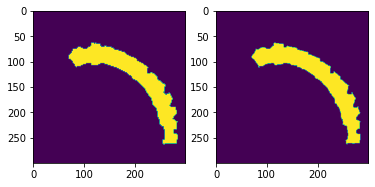

In [ ]:

predicteds=predicteds*255
conv_output_samples=conv_output_samples*255
predicteds=binary(predicteds,60)
conv_output_samples=binary(conv_output_samples,60)
plt.subplot(1,2,1)
#plt.title('predicted_img',color='blue') 
plt.imshow(predicteds)
plt.subplot(1,2,2)
#plt.title('initial_img',color='blue') 
plt.imshow(conv_output_samples)

In [ ]:
def IOU(y_true, y_pred):
        """
        y_true: Tensor，真实标签（one-hot类型），
        y_pred: Tensor，模型输出结果（one-hot类型），二者shape都为[N,H,W,C]或[N,H*W,C],C为总类别数,
        """
        y_true = y_true.reshape(1,-1) # 求argmax后，展平为一维
        y_pred = y_pred.reshape(1,-1)
        intersection = np.sum(np.multiply(y_true.astype('bool'),y_pred == 1))
        union = np.sum((y_true.astype('bool')+y_pred.astype('bool'))>0) 
        return intersection/union
num_classes=2
iou=IOU(predicteds,conv_output_samples)
iou


0.9594608087868197

In [ ]:
iou_sum=0
false_count_075=[]
false_count_060=[]
false_count_090=[]
false_count_nb=[]
for i in range(0,y_test.shape[0]):
  output_samples=X_test
  # pick 10 indices
  idxs = np.array([i])

  # prepare test samples as a batch of 10 images
  conv_output_samples = np.array(output_samples[idxs])
  conv_output_samples = np.reshape(conv_output_samples, (1,img_size,img_size, 1))
  test_input_samples=np.array(initial_img[idxs])
  test_input_samples_img = np.reshape(test_input_samples, (1,img_size,img_size, 1))
  test_input_sample_signal=np.array(y_test[idxs])
  # get the encoder ouput
  #encoded = convolutional_encoder_model.predict([test_input_samples_img,test_input_sample_signal])

  # get a prediction for some values in the dataset
  predicted = vae_auto_models.predict([test_input_samples_img,test_input_sample_signal])

  # display the samples, encodings and decoded values!
  #display_results(test_input_samples,predicted,conv_output_samples, enc_shape=(7,7))
  predicteds=np.reshape(predicted,[300,300])
  conv_output_samples=np.reshape(conv_output_samples,[300,300])
  predicteds=predicteds*255
  conv_output_samples=conv_output_samples*255
  # display the samples, encodings and decoded values!
  #display_results(test_input_samples,predicted,conv_output_samples, enc_shape=(7,7))
  predicteds=binary(predicteds,60)
  #print("the current one is ",i)
  conv_output_samples=binary(conv_output_samples,60)
  iou=IOU(predicteds,conv_output_samples)
  #print("the current img's iou is",iou)
  iou_sum=iou_sum+iou
  if(iou>0.90):false_count_nb.append(i)
  if(iou<0.75 and iou>0.6):false_count_075.append(i)
  if(iou<0.90 and iou>0.75):false_count_090.append(i)
  if(iou<0.60):false_count_060.append(i)
miou=iou_sum/y_test.shape[0]

In [ ]:
print("the performance too bad at,below 60")
for idx in false_count_060:
  print(idx)


print("the mean of iou is ",miou)
print("the num that NB is ",len(false_count_nb))
print("the num that can't meet the 90 demand is ",len(false_count_090))
print("the num that can't meet the 75 demand is ",len(false_count_075))
print("the num that can't meet the 60 demand is ",len(false_count_060))



the performance too bad at,below 60
9
15
59
66
72
78
the mean of iou is  0.8938434498949712
the num that NB is  92
the num that can't meet the 90 demand is  15
the num that can't meet the 75 demand is  7
the num that can't meet the 60 demand is  6


In [ ]:
print("the performance too bad at,below 75")
for idx in false_count_075:
  print(idx)

the performance too bad at,below 75
58
59
71
72
73
162
223
224
225
226
227
228
229
231
232
233
234
235
236
237
238
239
240
278
323
372
419


In [ ]:
print("the performance too bad at,below 90")
for idx in false_count_090:
  print(idx)

In [ ]:
print("the performance too bad at, NB")
for idx in false_count_nb:
  print(idx)

Text(0.5, 1.0, 'initial_img')

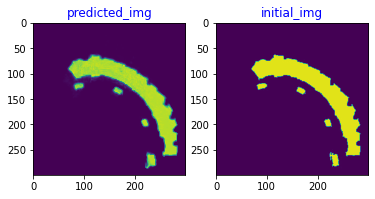

In [ ]:
def display_one_row(disp_images, offset, shape=(img_size, img_size)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_predicted,disp_expect, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(img_size,img_size,))
  #display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_expect, 10, shape=(img_size,img_size,))
  display_one_row(disp_predicted, 20, shape=(img_size,img_size,))
# take 1 batch of the dataset
#test_dataset = test_dataset.take(1)

# take the input images and put them in a list
# output_samples = []
# for input_image in tfds.as_numpy(X_test):
#       output_samples = input_image
output_samples=X_test
# pick 10 indices
idxs = np.array([36])

# prepare test samples as a batch of 10 images
conv_output_samples = np.array(output_samples[idxs])
conv_output_samples = np.reshape(conv_output_samples, (1,img_size,img_size, 1))
test_input_samples=np.array(X_test_initial[idxs])
test_input_samples_img = np.reshape(test_input_samples, (1,img_size,img_size, 1))
test_input_sample_signal=np.array(y_test[idxs])
# get the encoder ouput
#encoded = convolutional_encoder_model.predict([test_input_samples_img,test_input_sample_signal])

# get a prediction for some values in the dataset
predicted = vae_auto_models.predict([test_input_samples_img,test_input_sample_signal])

# display the samples, encodings and decoded values!
#display_results(test_input_samples,predicted,conv_output_samples, enc_shape=(7,7))
predicteds=np.reshape(predicted,[300,300])
conv_output_samples=np.reshape(conv_output_samples,[300,300])
plt.subplot(1,2,1)
plt.title('predicted_img',color='blue') 
plt.imshow(predicteds)
plt.subplot(1,2,2)
plt.imshow(conv_output_samples)
plt.title('initial_img',color='blue') 

# end effector coord

In [ ]:
def get_rectangle_coord(img):
  img=img*255
  coord=[]
  img= np.array(img, dtype=np.uint8)
  # cv2.threshold：参数1是源图片, 参数2是阈值, 参数3是填充色, 参数4是阈值类型
  ret, thresh = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
  black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)

  contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for cnt in contours:
    
    if (cv2.contourArea(cnt) < 2000 ):
        continue
    x, y, w, h = cv2.boundingRect(cnt)
    epsilon = 0.01 * cv2.arcLength(cnt,True)
    # cv2.approxPolyDP：参数1是轮廓，参数2是epsilon值，表源轮廓与近似多边形的最大差值，参数3是布尔标记，表示多边形是否闭合
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt) # 获取处理过的轮廓信息
    cv2.drawContours(black, [cnt], -1, (0, 255, 0), thickness=-1)
    coord.append([x,y])
    #cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    #cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
#     kernel = np.ones(shape=[1,1],dtype=np.uint8)
#     black = cv2.erode(black,kernel=kernel)  # 腐蚀操作
  return coord,black

def coord_loss(cores1,cores2):
  loss=0.542*abs(cores1-cores2)
  return loss

the coordinate of predicted image is 
 [[54, 80]]


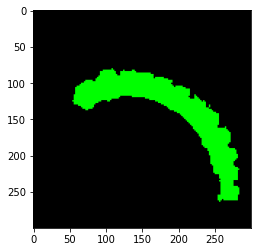

In [ ]:
cores3,mask3=get_rectangle_coord(predicteds)
print("the coordinate of predicted image is \n",cores3)
plt.imshow(mask3)

the coordinate of predicted image is 
 [[54 80]]
the coordinate of initail image is 
 [[54 83]]
the loss of coordinate is 
 [[0.    1.626]]


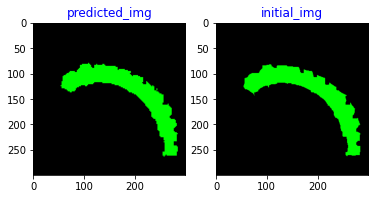

In [ ]:
cores1,mask1=get_rectangle_coord(predicteds)
cores2,mask2=get_rectangle_coord(conv_output_samples)
cores1=np.array(cores1)
cores2=np.array(cores2)
loss=coord_loss(cores1,cores2)
plt.subplot(1,2,1)
plt.title('predicted_img',color='blue') 
plt.imshow(mask1)
plt.subplot(1,2,2)
plt.title('initial_img',color='blue') 
plt.imshow(mask2)

print("the coordinate of predicted image is \n",cores1)
print("the coordinate of initail image is \n",cores2)
print("the loss of coordinate is \n",loss)


In [ ]:
loss.shape

(1, 2)

In [ ]:
losses=[]
for i in range(0,y_test.shape[0]):
  output_samples=X_test
  # pick 10 indices
  idxs = np.array([i])

  # prepare test samples as a batch of 10 images
  conv_output_samples = np.array(output_samples[idxs])
  conv_output_samples = np.reshape(conv_output_samples, (1,img_size,img_size, 1))
  test_input_samples=np.array(initial_img[idxs])
  test_input_samples_img = np.reshape(test_input_samples, (1,img_size,img_size, 1))
  test_input_sample_signal=np.array(y_test[idxs])
  # get the encoder ouput
  #encoded = convolutional_encoder_model.predict([test_input_samples_img,test_input_sample_signal])

  # get a prediction for some values in the dataset
  predicted = vae_auto_models.predict([test_input_samples_img,test_input_sample_signal])

  # display the samples, encodings and decoded values!
  #display_results(test_input_samples,predicted,conv_output_samples, enc_shape=(7,7))
  predicteds=np.reshape(predicted,[300,300])
  conv_output_samples=np.reshape(conv_output_samples,[300,300])
  predicteds=predicteds*255
  conv_output_samples=conv_output_samples*255
  # display the samples, encodings and decoded values!
  #display_results(test_input_samples,predicted,conv_output_samples, enc_shape=(7,7))
  predicteds=binary(predicteds,60)
  #print("the current one is ",i)
  conv_output_samples=binary(conv_output_samples,60)
  cores1,mask1=get_rectangle_coord(predicteds)
  cores2,mask2=get_rectangle_coord(conv_output_samples)
  cores1=np.array(cores1)
  
  cores2=np.array(cores2)
  loss=coord_loss(cores1,cores2)
  losses.append(loss)
  # print("the coordinate of predicted image is \n",cores1)
  # print("the coordinate of initail image is \n",cores2)
  # print("the loss of coordinate is \n",loss)
  # show_loss(loss)

In [ ]:
losses=np.array(losses)
losses=losses.reshape(120,2)
losses.shape

(120, 2)

In [ ]:
np.mean(losses,axis=0)

array([2.3577    , 1.57631667])

In [ ]:
np.max(losses,axis=0)

array([35.23 , 26.558])

In [ ]:
np.sort(losses,axis=0)[-50:-1]

array([[ 5.42 ,  2.71 ],
       [ 5.42 ,  2.71 ],
       [ 5.962,  2.71 ],
       [ 5.962,  2.71 ],
       [ 5.962,  2.71 ],
       [ 5.962,  2.71 ],
       [ 5.962,  2.71 ],
       [ 6.504,  2.71 ],
       [ 6.504,  2.71 ],
       [ 6.504,  2.71 ],
       [ 6.504,  2.71 ],
       [ 6.504,  2.71 ],
       [ 6.504,  3.252],
       [ 7.046,  3.252],
       [ 7.046,  3.252],
       [ 7.046,  3.252],
       [ 7.046,  3.252],
       [ 7.588,  3.252],
       [ 7.588,  3.252],
       [ 7.588,  3.252],
       [ 7.588,  3.252],
       [ 7.588,  3.794],
       [ 7.588,  3.794],
       [ 7.588,  3.794],
       [ 7.588,  3.794],
       [ 7.588,  3.794],
       [ 7.588,  3.794],
       [ 7.588,  3.794],
       [ 7.588,  3.794],
       [ 9.214,  4.336],
       [ 9.756,  4.336],
       [10.298,  4.336],
       [11.382,  4.336],
       [11.382,  4.336],
       [12.466,  4.336],
       [14.092,  4.336],
       [14.092,  4.336],
       [14.092,  4.336],
       [14.092,  4.336],
       [14.092,  4.336],


# marker detection

In [ ]:
def findcore(coordinates):
  cores=[]
  for coordinate in coordinates:
    x = coordinate[0]+coordinate[2]/2
    y = coordinate[1]+coordinate[3]/2
    cores.append([x,y])
    
  return np.array(cores)
def get_rectangle_coord(img):
  img=img*255
  img= np.array(img, dtype=np.uint8)
  mask = np.zeros(img.shape,dtype=np.uint8)
  ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  mask = np.zeros(img.shape,dtype=np.uint8)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  cv_contours = []
  coordinates=[]
  num=0
  for contour in contours:
      area = cv2.contourArea(contour)
      if area <= 700 and area>=70:
        #cv_contours.append(contour)
        x, y, w, h = cv2.boundingRect(contour)
        if(x+w<250 and h<70):
          cv2.drawContours(mask, contour, -1, (255), 1)
          coordinates.append([x,y,w,h])
          num=num+1
      else:
          continue
  print(num)
  cores=findcore(coordinates)
  return cores,mask
def coord_loss(cores1,cores2):
  loss=abs(cores1-cores2)/cores2
  return loss
def show_loss(losss):
  for i in range(0,4):
    print("the loss of x{} is {}%,the loss of y{} is {}%".format(i,losss[i][0]*100,i,losss[i][1]*100))

4
the coordinate of predicted image is 
 [[231. 273.]
 [219. 197.]
 [166. 135.]
 [ 90. 126.]]


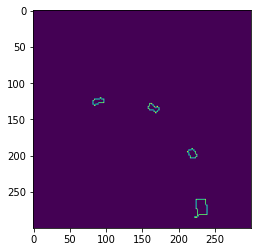

In [ ]:
cores3,mask3=get_rectangle_coord(predicteds)
print("the coordinate of predicted image is \n",cores3)
plt.imshow(mask3)

4
4
the coordinate of predicted image is 
 [[231. 273.]
 [219. 197.]
 [166. 135.]
 [ 90. 126.]]
the coordinate of initail image is 
 [[232.  269. ]
 [219.5 197.5]
 [166.5 134.5]
 [ 90.  126.5]]
the loss of coordinate is 
 [[0.00431034 0.01486989]
 [0.0022779  0.00253165]
 [0.003003   0.00371747]
 [0.         0.00395257]]
the loss of x0 is 0.43103448275862066%,the loss of y0 is 1.486988847583643%
the loss of x1 is 0.22779043280182232%,the loss of y1 is 0.25316455696202533%
the loss of x2 is 0.3003003003003003%,the loss of y2 is 0.37174721189591076%
the loss of x3 is 0.0%,the loss of y3 is 0.3952569169960474%


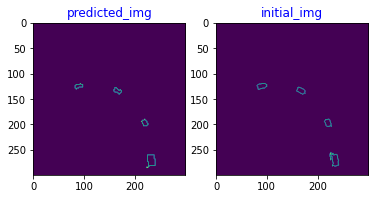

In [ ]:
cores1,mask1=get_rectangle_coord(predicteds)
cores2,mask2=get_rectangle_coord(conv_output_samples)
cores1=np.array(cores1)
cores2=np.array(cores2)
loss=coord_loss(cores1,cores2)
plt.subplot(1,2,1)
plt.title('predicted_img',color='blue') 
plt.imshow(mask1)
plt.subplot(1,2,2)
plt.title('initial_img',color='blue') 
plt.imshow(mask2)

print("the coordinate of predicted image is \n",cores1)
print("the coordinate of initail image is \n",cores2)
print("the loss of coordinate is \n",loss)
show_loss(loss)